In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Banking – Predicting Loan Default (AdaBoost)
A bank wants to predict whether a customer will default on a loan (Yes/No) based on:
Monthly_Income (in local currency)
Loan_Amount (requested loan size)
Credit_Score (rating between 300–850)
Since individual decision trees can be weak learners (often shallow stumps), the bank applies AdaBoost.
AdaBoost sequentially trains trees, giving higher weights to misclassified customers (e.g., those who defaulted but were predicted safe).
Each new tree focuses more on these “hard cases.”
Final prediction is a weighted vote across all trees.

In [2]:
df = pd.read_excel("loan_default.xlsx")
df.head()

,Customer_ID,Monthly_Income,Loan_Amount,Credit_Score,Default
0,CUST3001,81422,6899,635,No
1,CUST3002,40795,6267,562,No
2,CUST3003,25860,36551,638,Yes
3,CUST3004,63158,16394,580,No
4,CUST3005,87570,8556,662,Yes


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     50 non-null     object
 1   Monthly_Income  50 non-null     int64 
 2   Loan_Amount     50 non-null     int64 
 3   Credit_Score    50 non-null     int64 
 4   Default         50 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

DTC = DecisionTreeClassifier(max_depth=1)

RFC = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(estimator=DTC, n_estimators=100, random_state=42)

X = df.drop(["Customer_ID", "Default"], axis=1)
y = df["Default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

ada.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [56]:
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.50      0.62         8
         Yes       0.60      0.86      0.71         7

    accuracy                           0.67        15
   macro avg       0.70      0.68      0.66        15
weighted avg       0.71      0.67      0.66        15

0.6666666666666666


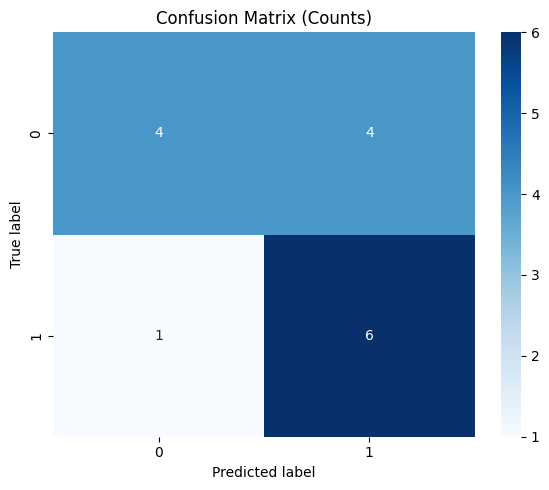

In [43]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,         
    fmt="d",             
    cmap="Blues",        
    cbar=True
)
plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()
